In [1]:
import pandas as pd
from scipy import stats 
import numpy as np
import json

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import defaultdict

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Load Data

In [31]:
#load word with years json

with open("data/words_with_years.json") as dw:
    word_years_dict = json.load(dw)
    #default dict value of 2015
    word_years_dict = defaultdict(lambda: 2015, word_years_dict)
    
df_words = pd.DataFrame.from_dict(word_years_dict, orient='index')

df_words.index.name = 'word'
df_words.columns = ['date']
df_words.reset_index()

,word,date
0,widow-bird,1772
1,the less/little world,1200
2,symbolistic,1864
3,rectificative,1869
4,tennis-play,1440
5,milliner,1529
6,feldwesten,10
7,pierrerie,1400
8,leap-head,1611
9,lambed,1844


In [39]:
df_words['date'].count()

345608

In [42]:
num_words = []
for y in range(1000, 2000, 1):
     num_words.append(df_words[df_words['date'] < y]['date'].count())
        


In [45]:
df_num_words = pd.DataFrame({'year': range(1000, 2000, 1), 'num_words': num_words})

In [3]:
#load number of articles by year
temp_store_path = "/Users/mark/Desktop/temp_data/"
with open(temp_store_path + "num_articles_by_year.json", "r") as f:
    article_years_dict = json.load(f)
    
df_articles = pd.DataFrame.from_dict(article_years_dict, orient='index')

df_articles.index.name = 'year'
df_articles.columns = ['number of articles']

## Basic Visualization

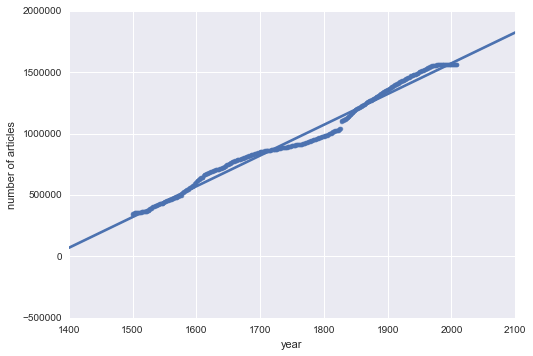

In [19]:
#line chart
df_articles['year'] = df_articles['year'].astype(int)
sns.regplot(x='year', y='number of articles', data=df_articles)


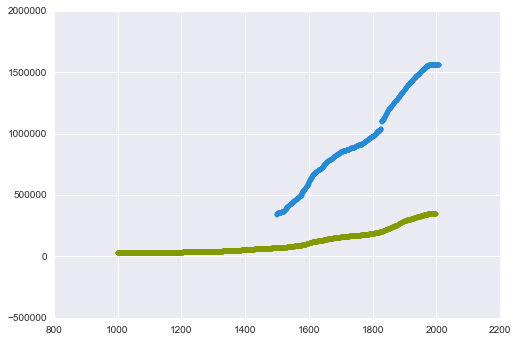

In [48]:
plt.scatter(df_articles['year'], df_articles['number of articles'], color='#268bd2')
plt.scatter(df_num_words['year'], df_num_words['num_words'], color='#859900')


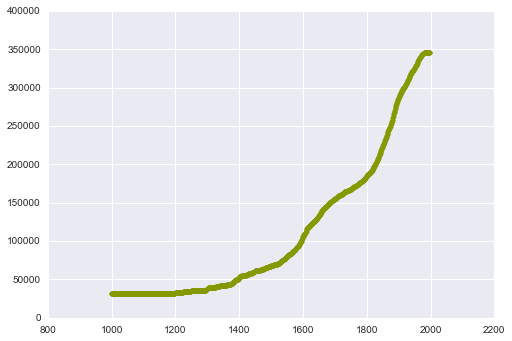

In [49]:
plt.scatter(df_num_words['year'], df_num_words['num_words'], color='#859900')


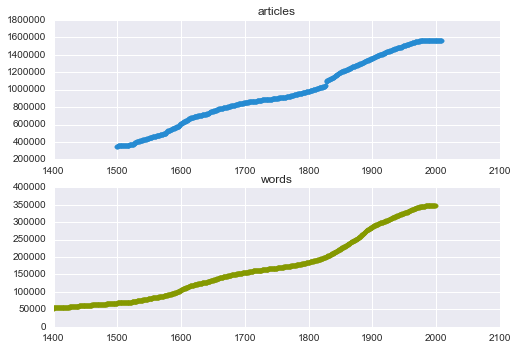

In [69]:
#pair plot 


fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.scatter(df_articles['year'], df_articles['number of articles'], color='#268bd2')
plt.title("articles")


ax2 = fig.add_subplot(212)
ax2.scatter(df_num_words['year'], df_num_words['num_words'], color='#859900')
plt.xlim([1400, 2100])
plt.title("words")

In [72]:
shift_value = df_articles['number of articles'].mean() - df_num_words['num_words'].mean()

In [73]:
df_num_words['shifted num_words'] = [w + shift_value for w in df_num_words['num_words']]

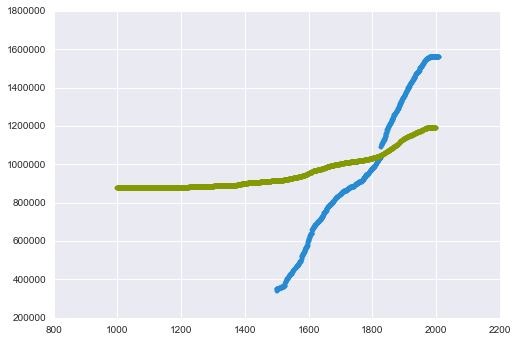

In [76]:
plt.scatter(df_articles['year'], df_articles['number of articles'], color='#268bd2')

plt.scatter(df_num_words['year'], df_num_words['shifted num_words'], color='#859900')

In [89]:
#combine dataframe

df_combined = pd.merge(df_articles, df_num_words, left_on='year', right_on='year', how='outer')

df_combined = df_combined.dropna()
df_combined = df_combined.drop(['index'], 1) #drop index column



In [92]:
#linear regression for num articles
slope, intercept, r_value, p_value, std_err = stats.linregress(df_combined['year'], df_combined['number of articles'])

print(slope, intercept, r_value)

2511.47960121 -3447512.56632 0.991995889159


In [93]:
#linear regression for num of words

slope, intercept, r_value, p_value, std_err = stats.linregress(df_combined['year'], df_combined['num_words'])

print(slope, intercept, r_value)

576.571039228 -823590.63113 0.97802039001
